<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/Heatmap_with_model_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 146 kB/s 


In [2]:
import joblib
import numpy as np
import pandas as pd

In [3]:
! unzip /content/models_temp_154_3fan.zip

Archive:  /content/models_temp_154_3fan.zip
   creating: content/models/
  inflating: content/models/model 53  
  inflating: content/models/model 81  
  inflating: content/models/model 47  
  inflating: content/models/model 32  
  inflating: content/models/model 128  
  inflating: content/models/model 116  
  inflating: content/models/model 115  
  inflating: content/models/model 18  
  inflating: content/models/model 7  
  inflating: content/models/model 27  
  inflating: content/models/model 134  
  inflating: content/models/model 79  
  inflating: content/models/model 54  
  inflating: content/models/model 80  
  inflating: content/models/model 132  
  inflating: content/models/model 60  
  inflating: content/models/model 130  
  inflating: content/models/model 123  
  inflating: content/models/model 127  
  inflating: content/models/model 25  
  inflating: content/models/model 103  
  inflating: content/models/model 145  
  inflating: content/models/model 109  
  inflating: content

In [5]:
feature = pd.read_excel('/content/Koordinat dan Input Skenario.xlsx',sheet_name='InputSkenario')
label = pd.read_excel('/content/data_big.xlsx',sheet_name='Sheet3')
feature.pop('Jam')
feature.pop('Fan')
feature.pop('Fan/i2')
feature.pop('Fan/i3')
feature.pop('Fan/i5')
feature.pop('Fan/o1')
feature.pop('Fan/o2')
feature.pop('Fan/o3')
feature.pop('Fan/o4')
feature.pop('Fan/o5')
feature.pop('Fan/o6')

0      0
1      0
2      0
3      0
4      0
      ..
187    1
188    1
189    1
190    1
191    1
Name: Fan/o6, Length: 192, dtype: int64

In [6]:
feature.head()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan/i1,Fan/i4,Fan/i6
0,0,0,171,0.5,27.0,0,0,0
1,0,0,153,0.4,31.5,0,0,0
2,0,0,47,4.8,33.1,0,0,0
3,0,0,62,4.1,27.4,0,0,0
4,0,0,341,3.8,30.6,0,0,0


In [7]:
array_y = []

for i in range(154):
  frame= label[i::154]
  frame = frame.drop(['koor_x','koor_y','koor_z',],axis=1)
  frame = frame.drop(['Vx','Vy','Vz','Jendela','AC','sudut angin','Nilai Kecepatan Angin','Dry Bulb Temperature','source'],axis=1)
  array_y.append(frame)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

skor_r2=[]
mae_=[]
rmse = []
y_predict = []
y_test = []
for i in range(154):
  x = np.array(feature)
  y = np.array(array_y[i])
  model = joblib.load(f'/content/content/models/model {i}')
  y_pred = model.predict(x)
  Skor_r2 = r2(y,y_pred)
  RMSE = mse(y,y_pred,squared=False)
  MAE = mae(y,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

ValueError: ignored

In [ ]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y = np.array(array_y)

In [ ]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
for i in range(192):
  a = y[...,i,0]
  b = y_predict[...,i]
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

In [ ]:
error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [ ]:
error.describe()

,r2,mae,rmse
count,192.000000,192.000000,192.000000
mean,-0.778809,1.376931,3.250019
std,4.491830,0.944163,3.842059
min,-42.237436,0.247888,0.101756
25%,-0.397230,0.511887,0.361088
50%,0.580682,1.279880,1.921640
75%,0.878920,1.995257,4.851043
max,0.977070,4.202183,19.748785


In [ ]:
y.shape,y_predict.shape

((154, 192, 1), (154, 192))

In [ ]:
r2_matrix = skor_r2.reshape(11,14)
rmse_matrix = rmse.reshape(11,14)
mae_matrix = mae_.reshape(11,14)

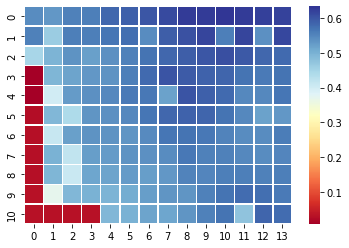

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

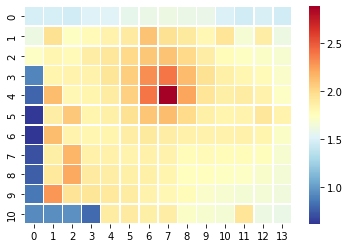

In [ ]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

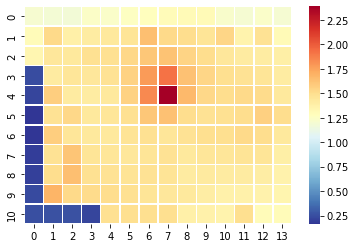

In [ ]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [ ]:
! mkdir subplot

In [ ]:
df_koor = pd.read_excel('koordinat.xlsx',header=None,names=['koor_x','koor_y'])

In [ ]:
df_koor.head()

,koor_x,koor_y
0,2.5,3
1,2.5,4
2,2.5,5
3,2.5,6
4,2.5,7


In [ ]:
def suhu(y):
  df_y = pd.DataFrame(y)
  df_z = pd.DataFrame(y)
  df_z.rename(columns={0:1},inplace=True)
  df_y = df_y.join(df_z)
  df_y = df_y.join(df_koor)
  df_y.rename(columns={0:'Vx',1:'suhu'},inplace=True)
  df_y.pop('Vx')
  return df_y

In [ ]:
from plotly.subplots import make_subplots
for i in range(192):
  a = y[(...,i,0)]
  b = y_predict[(...,i)]
  a = np.array(a)
  b = np.array(b)
  a = suhu(a)
  b = suhu(b)
  
  fig = make_subplots(rows=1, cols=2)

  fig.add_contour(
     z = a['suhu'].tolist(),
     x = a['koor_x'].tolist(),
     y = a['koor_y'].tolist(),
     row=1, col=1
  )

  fig.add_contour(
     z = b['suhu'].tolist(),
     x = b['koor_x'].tolist(),
     y = b['koor_y'].tolist(),
     row=1, col=2
  )
  fig.write_image(f'/content/subplot/fig {i}.png')

In [ ]:
!zip -r /content/subplot.zip /content/subplot

  adding: content/subplot/ (stored 0%)
  adding: content/subplot/fig 104.png (deflated 8%)
  adding: content/subplot/fig 42.png (deflated 4%)
  adding: content/subplot/fig 15.png (deflated 3%)
  adding: content/subplot/fig 141.png (deflated 6%)
  adding: content/subplot/fig 16.png (deflated 4%)
  adding: content/subplot/fig 156.png (deflated 5%)
  adding: content/subplot/fig 123.png (deflated 8%)
  adding: content/subplot/fig 144.png (deflated 4%)
  adding: content/subplot/fig 28.png (deflated 4%)
  adding: content/subplot/fig 110.png (deflated 5%)
  adding: content/subplot/fig 98.png (deflated 6%)
  adding: content/subplot/fig 68.png (deflated 3%)
  adding: content/subplot/fig 146.png (deflated 6%)
  adding: content/subplot/fig 129.png (deflated 7%)
  adding: content/subplot/fig 23.png (deflated 4%)
  adding: content/subplot/fig 5.png (deflated 5%)
  adding: content/subplot/fig 182.png (deflated 4%)
  adding: content/subplot/fig 70.png (deflated 4%)
  adding: content/subplot/fig 145.p